In [1]:
from datasets import load_dataset

C:\Users\lukak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset("imagefolder", data_dir="slike_kuce_bgns")
dataset = dataset.rename_column("label", "labels")
print(dataset)
train_ds = dataset["train"]
print(train_ds[0])  # jedan primer (slika + labela)

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 689
    })
    validation: Dataset({
        features: ['image', 'labels'],
        num_rows: 109
    })
    test: Dataset({
        features: ['image', 'labels'],
        num_rows: 108
    })
})
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x277E3C9B770>, 'labels': 0}


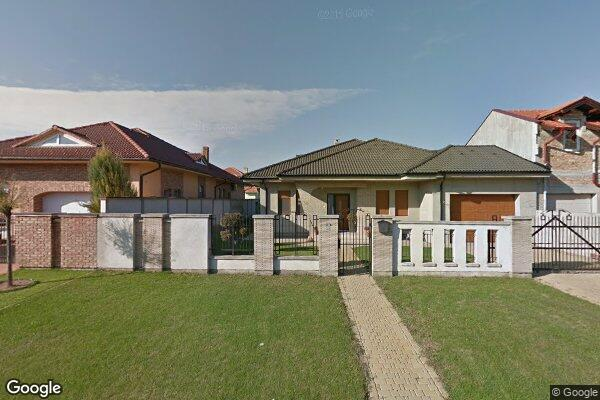

In [3]:
image = train_ds[0]["image"]
image

In [4]:
labels = dataset['train'].features['labels']
labels

ClassLabel(names=['dobre', 'nepoznato', 'oronule', 'srednje'])

In [5]:
from transformers import ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)

In [6]:
processor(image, return_tensors='pt')

{'pixel_values': tensor([[[[ 0.0588,  0.0588,  0.0588,  ..., -0.0902, -0.0902, -0.0902],
          [ 0.0588,  0.0588,  0.0588,  ..., -0.0902, -0.0902, -0.0902],
          [ 0.0667,  0.0667,  0.0667,  ..., -0.0824, -0.0824, -0.0824],
          ...,
          [-0.2235, -0.2078, -0.2941,  ..., -0.2863, -0.2392, -0.6549],
          [-0.2235, -0.2627, -0.2706,  ..., -0.7490, -0.7255, -0.7176],
          [-0.2392, -0.3176, -0.2471,  ..., -0.7255, -0.7333, -0.7412]],

         [[ 0.2235,  0.2235,  0.2235,  ...,  0.1373,  0.1451,  0.1451],
          [ 0.2235,  0.2235,  0.2235,  ...,  0.1373,  0.1451,  0.1451],
          [ 0.2314,  0.2314,  0.2314,  ...,  0.1451,  0.1529,  0.1529],
          ...,
          [-0.1843, -0.1686, -0.2627,  ..., -0.2863, -0.2392, -0.6549],
          [-0.1765, -0.2157, -0.2235,  ..., -0.7412, -0.7176, -0.7098],
          [-0.2000, -0.2784, -0.2078,  ..., -0.7176, -0.7255, -0.7333]],

         [[ 0.3882,  0.3882,  0.3882,  ...,  0.3725,  0.3647,  0.3647],
          [ 0

In [8]:
def process_example(example):
    inputs = processor(example['image'], return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs

process_example(train_ds[0])

{'pixel_values': tensor([[[[ 0.0588,  0.0588,  0.0588,  ..., -0.0902, -0.0902, -0.0902],
          [ 0.0588,  0.0588,  0.0588,  ..., -0.0902, -0.0902, -0.0902],
          [ 0.0667,  0.0667,  0.0667,  ..., -0.0824, -0.0824, -0.0824],
          ...,
          [-0.2235, -0.2078, -0.2941,  ..., -0.2863, -0.2392, -0.6549],
          [-0.2235, -0.2627, -0.2706,  ..., -0.7490, -0.7255, -0.7176],
          [-0.2392, -0.3176, -0.2471,  ..., -0.7255, -0.7333, -0.7412]],

         [[ 0.2235,  0.2235,  0.2235,  ...,  0.1373,  0.1451,  0.1451],
          [ 0.2235,  0.2235,  0.2235,  ...,  0.1373,  0.1451,  0.1451],
          [ 0.2314,  0.2314,  0.2314,  ...,  0.1451,  0.1529,  0.1529],
          ...,
          [-0.1843, -0.1686, -0.2627,  ..., -0.2863, -0.2392, -0.6549],
          [-0.1765, -0.2157, -0.2235,  ..., -0.7412, -0.7176, -0.7098],
          [-0.2000, -0.2784, -0.2078,  ..., -0.7176, -0.7255, -0.7333]],

         [[ 0.3882,  0.3882,  0.3882,  ...,  0.3725,  0.3647,  0.3647],
          [ 0

In [9]:
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = processor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['labels']
    return inputs

In [10]:
prepared_ds = dataset.with_transform(transform)
prepared_ds['train'][0:2]

{'pixel_values': tensor([[[[ 0.0588,  0.0588,  0.0588,  ..., -0.0902, -0.0902, -0.0902],
          [ 0.0588,  0.0588,  0.0588,  ..., -0.0902, -0.0902, -0.0902],
          [ 0.0667,  0.0667,  0.0667,  ..., -0.0824, -0.0824, -0.0824],
          ...,
          [-0.2235, -0.2078, -0.2941,  ..., -0.2863, -0.2392, -0.6549],
          [-0.2235, -0.2627, -0.2706,  ..., -0.7490, -0.7255, -0.7176],
          [-0.2392, -0.3176, -0.2471,  ..., -0.7255, -0.7333, -0.7412]],

         [[ 0.2235,  0.2235,  0.2235,  ...,  0.1373,  0.1451,  0.1451],
          [ 0.2235,  0.2235,  0.2235,  ...,  0.1373,  0.1451,  0.1451],
          [ 0.2314,  0.2314,  0.2314,  ...,  0.1451,  0.1529,  0.1529],
          ...,
          [-0.1843, -0.1686, -0.2627,  ..., -0.2863, -0.2392, -0.6549],
          [-0.1765, -0.2157, -0.2235,  ..., -0.7412, -0.7176, -0.7098],
          [-0.2000, -0.2784, -0.2078,  ..., -0.7176, -0.7255, -0.7333]],

         [[ 0.3882,  0.3882,  0.3882,  ...,  0.3725,  0.3647,  0.3647],
          [ 0

In [11]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [12]:
import numpy as np
from evaluate import load

metric = load("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

In [13]:
from transformers import ViTForImageClassification

labels = dataset['train'].features['labels'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="C:/Users/lukak/OneDrive/Dokumenti/vit-results",
  per_device_train_batch_size=16,
  eval_strategy="steps",
  num_train_epochs=5,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)
# help(TrainingArguments)

# TrainingArguments(
#     output_dir="model",
#     num_train_epochs=3,
#     per_device_train_batch_size=16,
#     learning_rate=2e-5,
# )

In [15]:
import transformers
print(transformers.__version__)
print(transformers.__file__)
# !pip show transformers

4.57.1
C:\Users\lukak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\transformers\__init__.py


In [16]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["validation"],
    tokenizer=processor,
)

C:\Users\lukak\AppData\Local\Temp\ipykernel_1364\3439825433.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [17]:
import os
print("CWD:", os.getcwd())
print("Output dir:", os.path.abspath("./vit-results"))

CWD: c:\Users\lukak\OneDrive\Radna površina\rgz\kuce
Output dir: c:\Users\lukak\OneDrive\Radna površina\rgz\kuce\vit-results


In [18]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

C:\Users\lukak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
metrics = trainer.evaluate(prepared_ds['validation'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)